In [1]:
#imports

#spark for variale inspector
import pyspark 
import tensorflow
import keras

#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy 
from math import sqrt
import matplotlib.pyplot as plt 
import sklearn as sk
import seaborn as sns

#estimators 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#classfiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#model metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#cross validation 
from sklearn.model_selection import train_test_split

# random sample 
from random import sample 


Using TensorFlow backend.


In [2]:
#data
credit = pd.read_csv('default of credit card clients.csv', header =1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
%whos # gives varaibles like variable inspector 

No variables match your requested type.


In [5]:
#features
features = credit.iloc[:,12:23]
print('Summary of feature sample')

Summary of feature sample


In [6]:
print(features.head())
features.info()

   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0       3913       3102        689          0          0          0         0   
1       2682       1725       2682       3272       3455       3261         0   
2      29239      14027      13559      14331      14948      15549      1518   
3      46990      48233      49291      28314      28959      29547      2000   
4       8617       5670      35835      20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
0       689         0         0         0  
1      1000      1000      1000         0  
2      1500      1000      1000      1000  
3      2019      1200      1100      1069  
4     36681     10000      9000       689  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL

In [7]:
#dependent variable
depVar = credit['default payment next month']

In [8]:
# import random                 ######### Try out 
# random.seed( 30 )
# print ("first - ", random.randint(25,50))
# print ("Second - ", random.randint(10,20))

In [9]:
# Data Partition 
import random
random.seed( 200 ) # to anchor the same subset (randomly choose the first time, but it will be the same subset)
X = features
y = depVar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
##### Cross validation 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [11]:
X_train.shape, X_test.shape # 11 is the variables number (features) (n.ovbs, n.vars)

((16875, 11), (5625, 11))

In [12]:
y_train.shape, y_test.shape # 11 is the variables number (features) (n.ovbs, n.vars)

((16875,), (5625,))

In [13]:
#Models  ###  needed to change for classification models, this practice was designed to have regression for PAY_AMT6 
modelSVR = SVR() # regression
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [14]:
features.head()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [15]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [16]:
###################### Classification models 

In [17]:
# Classidication Models 
modelSVC = SVC()
modelRFC = RandomForestClassifier()
modelLGR = LogisticRegression()

In [18]:
# SVM classifier 
modelSVC.fit(X_train,y_train)
SVC = modelSVC.predict(X_test) # to predict Y 
print(SVC) # Y predictions 


[0 0 0 ... 0 0 0]


In [19]:
print(cross_val_score(modelSVC, X_train, y_train).mean())
modelSVC.score(X_train,y_train)

0.7770666666666667


0.7774814814814814

In [20]:
print('Accuracy', sk.metrics.accuracy_score(y_test,  SVC)) # compare with ground truth #y_test 
print('Kappa', sk.metrics.cohen_kappa_score(y_test,  SVC)) # why high accuracy but low kappa?? 
# low Kappa means the extra obs would have not been noticed, 
# around 80% truth will NOT default, and model cannot predict behavior of the 20 % will default 
# ACTION >> need to boost Kappa ! 

Accuracy 0.7834666666666666
Kappa 0.0012845364954426897


In [21]:
print(sk.metrics.confusion_matrix(y_test,  SVC))

[[4406    0]
 [1218    1]]


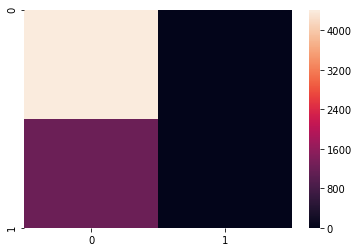

In [22]:
sns.heatmap(sk.metrics.confusion_matrix(y_test,  SVC))

Text(0.5, 1, 'Confusion Matrix')

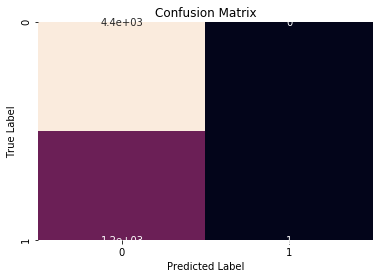

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, SVC)
sns.heatmap(matrix,annot=True,cbar=False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


In [24]:
# RF classifier 
modelRFC.fit(X_train,y_train)
RFC = modelRFC.predict(X_test)
print(RFC)

[0 0 1 ... 0 0 0]


In [25]:
print(cross_val_score(modelRFC, X_train, y_train).mean())
modelRFC.score(X_train,y_train) # RF tends to over fit the model 

0.7808592592592591


0.9867259259259259

In [26]:
print('Accuracy', sk.metrics.accuracy_score(y_test,  RFC))
print('Kappa', sk.metrics.cohen_kappa_score(y_test,  RFC))

Accuracy 0.7886222222222222
Kappa 0.21092180378866088


In [27]:
print('Matrix',sk.metrics.confusion_matrix(y_test,  RFC))

Matrix [[4167  239]
 [ 950  269]]


In [28]:
pd.DataFrame(matrix) # make it to dataframe if sme functions required one, from array or list. 

,0,1
0,4406,0
1,1218,1


In [29]:
# KNN classifier 
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
KNN = modelKNN.predict(X_test)
print(cross_val_score(modelKNN, X_train, y_train).mean())
print(modelKNN.score(X_train,y_train))
KNN = modelKNN.predict(X_test)

0.7559703703703704
0.8125629629629629


In [31]:
print('Accuracy', sk.metrics.accuracy_score(y_test,  KNN)) # compare with ground truth #y_test 
print('Kappa', sk.metrics.cohen_kappa_score(y_test,  KNN)) # why high accuracy but low kappa?? 

Accuracy 0.7610666666666667
Kappa 0.10839152179404832


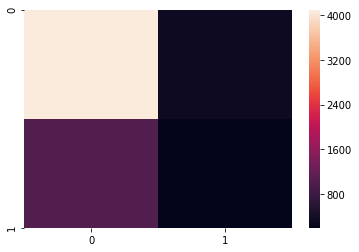

In [32]:
sk.metrics.confusion_matrix(y_test,  KNN)
sns.heatmap(sk.metrics.confusion_matrix(y_test,  KNN))

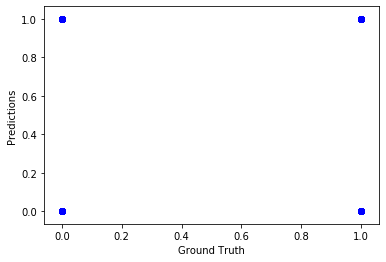

In [33]:
plt.scatter(y_test, KNN, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [34]:
############### Oversampling - SMOTE to fix unbalanced DF - too little default, low Kappa, etc. 
from imblearn.over_sampling import SMOTE
# SMOTE
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)
X_test.head()
pd.DataFrame(X_train_res,  y_train_res)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

,0,1,2,3,4,5,6,7,8,9,10
1,437,0,437,0,4013,0,0,437,0,4013,0
0,46741,48883,50074,60158,75277,90464,2900,2000,14455,16560,17000
0,38324,3374,3620,0,0,0,3390,3638,0,0,0
0,43596,45765,41308,39770,31840,33173,6000,2,3006,2000,2000
0,59712,61743,63714,65056,73062,71738,3000,3000,2400,9100,0
...,...,...,...,...,...,...,...,...,...,...,...
1,19685,19091,19024,18331,17918,18163,0,524,0,0,349
1,408096,401073,400485,400126,408417,439459,8386,14396,14588,14829,37795
1,28147,29154,28790,30138,30493,29560,1755,422,2139,1006,0
1,14322,12645,4396,3357,3667,1183,0,1167,322,1719,0


In [35]:
from collections import Counter
# Check distribution of occurences -- 0 = 22996; 1 = 22996
print(sorted(Counter(y_train_res).items()))

[(0, 13113), (1, 13113)]


In [36]:
# Cross validate for oversampled dataset
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_train_res, y_train_res) 

In [37]:
X_trainR.shape, X_testR.shape # 11 is the variables number (features) (n.ovbs, n.vars)

((19669, 11), (6557, 11))

In [38]:
y_trainR.shape, y_testR.shape # 11 is the variables number (features) (n.ovbs, n.vars)

((19669,), (6557,))

In [39]:
# KNN classifier ( weighted with FIXED n and WEIGHTed distance)
modelKNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance') # weighted are taking Euclidean distance
modelKNN.fit(X_trainR,y_trainR)

KNNR = modelKNN.predict(X_testR)
print(cross_val_score(modelKNN, X_trainR, y_trainR,cv=10).mean()) #CV= cross validate 10 times 
print(modelKNN.score(X_trainR,y_trainR)) #### easily overfitting 
print('Accuracy', sk.metrics.accuracy_score(y_testR,  KNNR)) # compare with ground truth #y_test 
print('Kappa', sk.metrics.cohen_kappa_score(y_testR,  KNNR)) # higher Kappa now thanks to overfitting 

0.7647054062426786
0.9833748538309014
Accuracy 0.7776422144273296
Kappa 0.5565618562448851


In [40]:
sk.metrics.confusion_matrix(y_testR, KNNR)

array([[2118, 1195],
       [ 263, 2981]], dtype=int64)

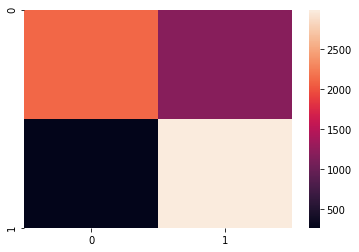

In [41]:
sns.heatmap(sk.metrics.confusion_matrix(y_testR,  KNNR))